**Task-05**: CREDIT CARD FRAUD DETECTION

**Author**: SaiCharan Indla

**Batch**: November - December

**Domain**: Data Science

**Aim**: To perform a Credit card fraud detection that helps to identify and prevent unauthorized or fraudulent transactions using advanced algorithms and data analysis.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
df = pd.read_csv('/content/SaiCharanIndlacreditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43681 entries, 0 to 43680
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    43681 non-null  int64  
 1   V1      43681 non-null  float64
 2   V2      43681 non-null  float64
 3   V3      43681 non-null  float64
 4   V4      43681 non-null  float64
 5   V5      43681 non-null  float64
 6   V6      43681 non-null  float64
 7   V7      43681 non-null  float64
 8   V8      43681 non-null  float64
 9   V9      43681 non-null  float64
 10  V10     43681 non-null  float64
 11  V11     43681 non-null  float64
 12  V12     43681 non-null  float64
 13  V13     43681 non-null  float64
 14  V14     43681 non-null  float64
 15  V15     43681 non-null  float64
 16  V16     43681 non-null  float64
 17  V17     43681 non-null  float64
 18  V18     43680 non-null  float64
 19  V19     43680 non-null  float64
 20  V20     43680 non-null  float64
 21  V21     43680 non-null  float64
 22

In [4]:
df.isna().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [5]:
df['Class'].unique()


array([ 0.,  1., nan])

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Time,43681.0,26893.979488,12815.783403,0.000000,18729.000000,31887.000000,36955.000000,41607.000000
V1,43681.0,-0.233396,1.881315,-56.407510,-0.980316,-0.245059,1.158092,1.960497
V2,43681.0,0.031730,1.613916,-72.715728,-0.538674,0.091870,0.740715,17.930550
V3,43681.0,0.700515,1.524353,-32.454198,0.225855,0.805036,1.437975,4.101716
V4,43681.0,0.191837,1.407184,-5.172595,-0.715351,0.190557,1.071150,16.491217
V5,43681.0,-0.243503,1.408869,-42.147898,-0.848223,-0.277329,0.291013,34.801666
V6,43681.0,0.099247,1.310533,-26.160506,-0.637896,-0.155875,0.486593,22.529298
V7,43681.0,-0.117648,1.272590,-26.548144,-0.599233,-0.072523,0.431336,36.677268
V8,43681.0,0.051557,1.214415,-41.484823,-0.149243,0.053284,0.322714,20.007208
V9,43681.0,0.173473,1.226008,-8.507059,-0.579404,0.053715,0.881468,10.392889


"""Feature Engineering"""

In [7]:
df['hour']= round(df['Time']/3600)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0.0


In [8]:
class_count = df['Class'].value_counts() #Count total number of rows of each classes.
class_count

0.0    43546
1.0      134
Name: Class, dtype: int64

In [9]:
duplicated_count = df.duplicated().sum()
duplicated_count


183

In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
fig = plt.figure(figsize=(10, 7))
labels = class_count.index
data = class_count.values


<Figure size 1000x700 with 0 Axes>

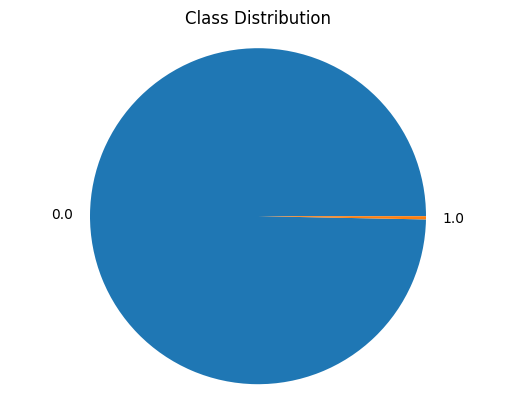

In [12]:
plt.pie(data, labels=labels)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

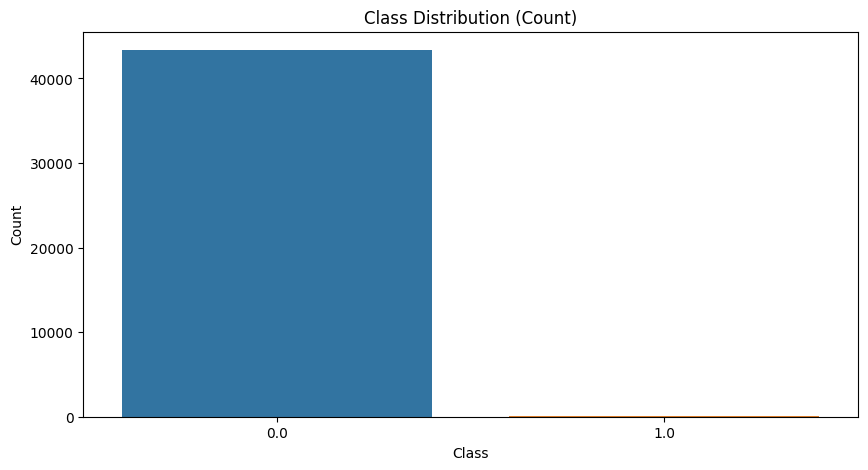

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x='Class')
plt.title('Class Distribution (Count)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<Axes: >

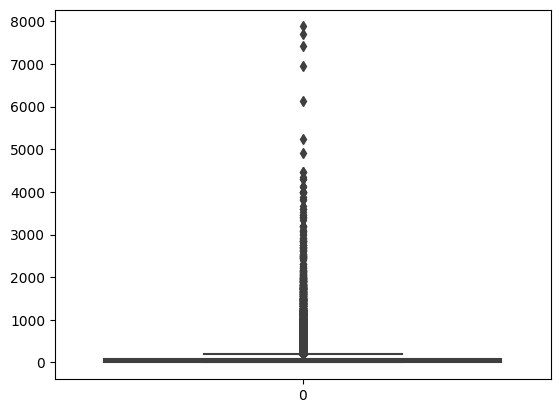

In [14]:
sns.boxplot(df['Amount'])

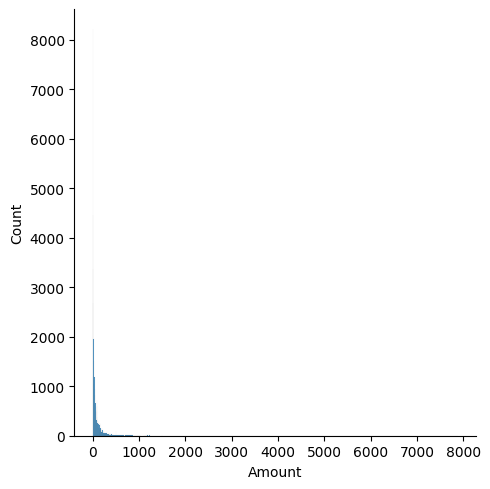

In [15]:
sns.displot(df['Amount']) #plotting distribution plot to check skewness of our data
plt.show()

In [16]:
df['Amount'].skew()

9.851754517865391

In [17]:
pt = PowerTransformer(method='yeo-johnson')   #power transformer is use for reduction of skewness of our data
df['Amount'] = pt.fit_transform(df[['Amount']])
df['Amount'].skew()


0.008685887673266227

<ipython-input-18-ae7ad042f4b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'])


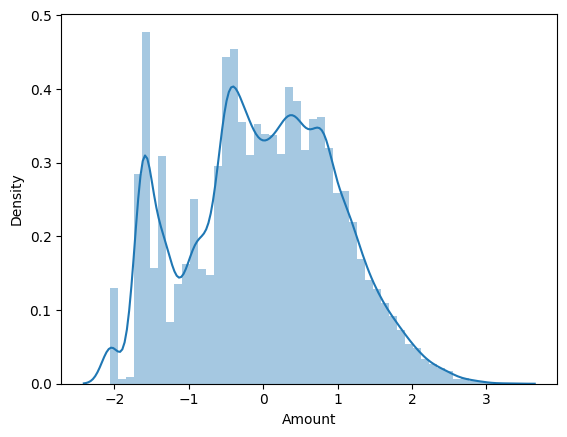

In [18]:
sns.distplot(df['Amount'])
plt.show()


In [19]:
scaler = StandardScaler()

In [20]:
df['Amount'] = scaler.fit_transform(df[['Amount']])


<Axes: >

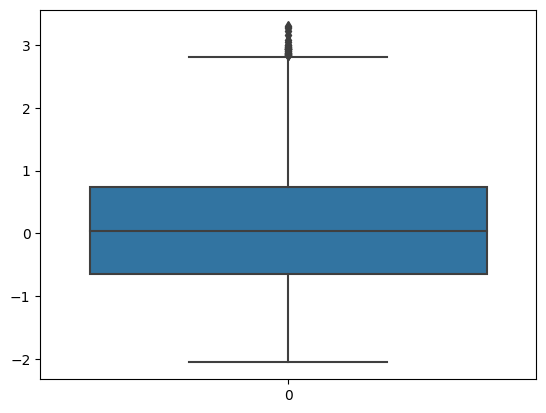

In [21]:
sns.boxplot(df['Amount'])

In [22]:
outliers = df['Amount'] > 3 # counting outliers
outliers.count()

43498

In [23]:
df['Amount']=df['Amount'] < 3 #dropping outliers
class_count

0.0    43546
1.0      134
Name: Class, dtype: int64

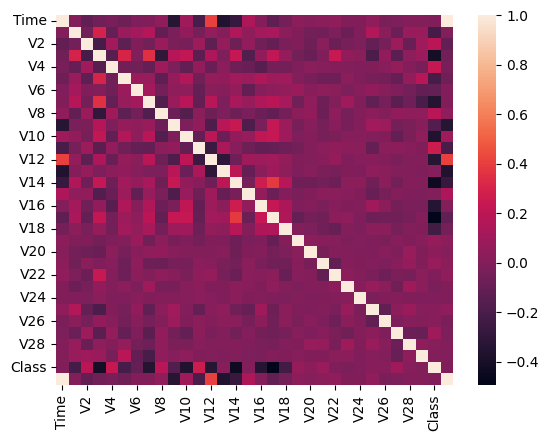

In [24]:
sns.heatmap(df.corr())    # checking correlation of each feature to our Label
plt.show()

In [25]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'hour'],
      dtype='object')

In [26]:
x = df.drop(columns = ['Class'])
y = df['Class']

In [27]:
import numpy as np

In [28]:
# Assuming y contains NaN values
nan_indices = np.isnan(y)
x = x[~nan_indices]
y = y[~nan_indices]

In [29]:
# Now, you can proceed with the train-test split
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=101, stratify=y)

"""Logistic Regression"""

In [31]:
model = LogisticRegression(class_weight = 'balanced') #creating model

In [32]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [33]:
train_pred = model.predict(x_train)


In [34]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     34690
         1.0       0.10      0.97      0.18       107

    accuracy                           0.97     34797
   macro avg       0.55      0.97      0.58     34797
weighted avg       1.00      0.97      0.98     34797



In [35]:
test_pred = model.predict(x_test)

In [36]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      8673
         1.0       0.10      0.93      0.17        27

    accuracy                           0.97      8700
   macro avg       0.55      0.95      0.58      8700
weighted avg       1.00      0.97      0.98      8700



"""Random classifier Forest"""

In [37]:
model_r = RandomForestClassifier(class_weight = 'balanced')

In [38]:
model_r.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [39]:
from sklearn.ensemble import RandomForestClassifier
model_r = RandomForestClassifier()
model_r.fit(x_train, y_train)
trainpred = model_r.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_train, trainpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34690
         1.0       1.00      1.00      1.00       107

    accuracy                           1.00     34797
   macro avg       1.00      1.00      1.00     34797
weighted avg       1.00      1.00      1.00     34797



In [40]:
testpred = model_r.predict(x_test)


In [41]:
print(classification_report(y_test,testpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8673
         1.0       0.93      0.93      0.93        27

    accuracy                           1.00      8700
   macro avg       0.96      0.96      0.96      8700
weighted avg       1.00      1.00      1.00      8700



"""XGBoost"""

In [42]:
model_X = xgb.XGBClassifier()
model_X.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
train_x_pred = model_X.predict(x_train)

In [44]:
print(classification_report(y_train,train_x_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34690
         1.0       1.00      1.00      1.00       107

    accuracy                           1.00     34797
   macro avg       1.00      1.00      1.00     34797
weighted avg       1.00      1.00      1.00     34797



In [45]:
test_x_pred = model_r.predict(x_test)

In [46]:
print(classification_report(y_test,test_x_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8673
         1.0       0.93      0.93      0.93        27

    accuracy                           1.00      8700
   macro avg       0.96      0.96      0.96      8700
weighted avg       1.00      1.00      1.00      8700

